#Metric to be tested- 95th Percentile on Order Delivery time should be less than 30 mins.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dominos_data.csv')

In [3]:
df.shape

(15000, 3)

In [4]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [7]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])

df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [9]:
#Order at day of month
df['order_placed_at'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [10]:
# order at day of week
df['order_placed_at'].dt.day_name()

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
14995       Monday
14996       Monday
14997       Monday
14998       Monday
14999       Monday
Name: order_placed_at, Length: 15000, dtype: object

In [11]:
df['day_of_month'] = df['order_placed_at'].dt.day
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1


In [12]:
df['day_of_week'] = df['order_placed_at'].dt.day_name()
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday


<Axes: >

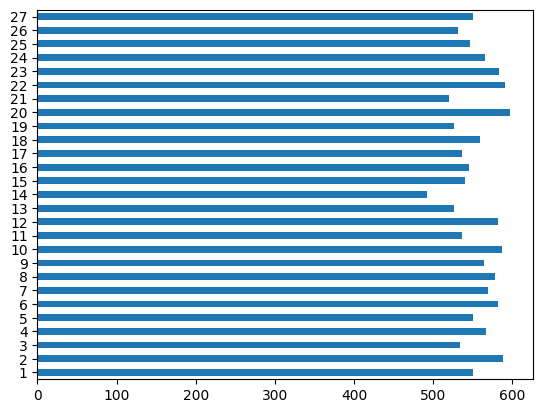

In [13]:

df['day_of_month'].value_counts().sort_index().plot(kind='barh')

<Axes: >

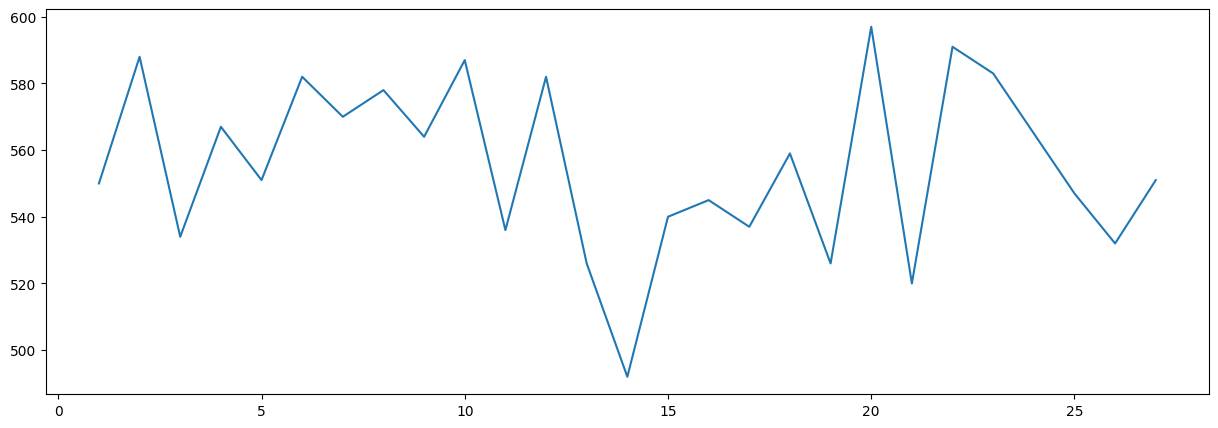

In [14]:
df['day_of_month'].value_counts().sort_index().plot(kind='line', figsize=(15,5))

In [15]:
df['day_of_week'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: day_of_week, dtype: int64

<Axes: >

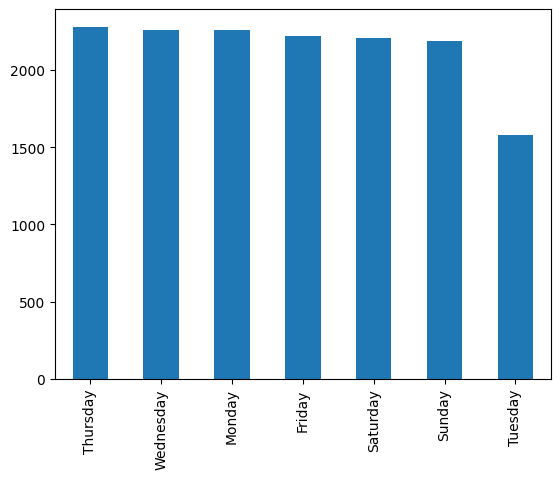

In [16]:
df['day_of_week'].value_counts().plot(kind='bar')

In [17]:
df['week_of_month'] = df['order_placed_at'].dt.week - 8

C:\Users\Vighnesh\AppData\Local\Temp\ipykernel_4124\2584617338.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_month'] = df['order_placed_at'].dt.week - 8


<Axes: >

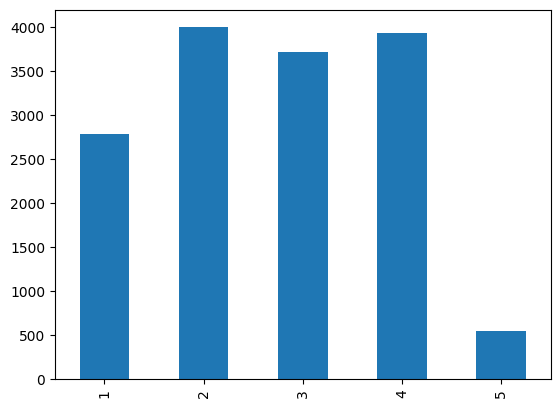

In [18]:
df['week_of_month'].value_counts().sort_index().plot(kind='bar')

In [19]:
df['deliver_time'] = df['order_delivered_at'] - df['order_placed_at']
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,week_of_month,deliver_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,1,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,1,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,1,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,1,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,1,0 days 00:16:10.619056


In [20]:
df['deliver_time'] = df['deliver_time'].dt.total_seconds() / 60
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,week_of_month,deliver_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,1,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,1,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,1,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,1,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,1,16.176984


#Before Transforming Outliers

In [21]:
df['deliver_time'].mean()

20.499389326467778

In [22]:
df['deliver_time'].median()

15.797986066666667

In [23]:
df['deliver_time'].std()

96.16036180216469

In [24]:
df['deliver_time'].quantile(0.25)

15.274825995833332

In [25]:
df['deliver_time'].quantile(0.75)

17.27966090416667

In [26]:
df['deliver_time'].quantile(0.95)

27.261043996666658

In [27]:
df['deliver_time'].quantile(0.99)

65.06418646900005

<Axes: >

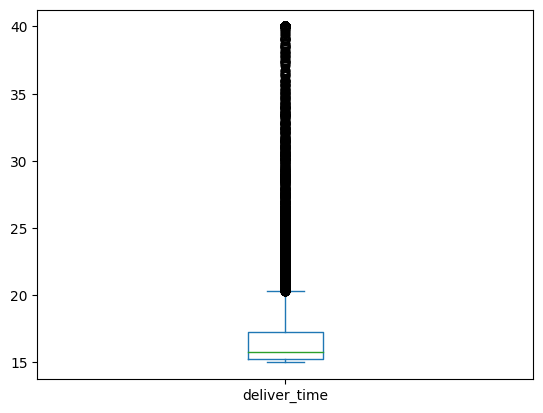

In [41]:
df['deliver_time'].plot(kind='box')

In [29]:
df[df['deliver_time']>31].value_counts

<bound method DataFrame.value_counts of        order_id     order_placed_at         order_delivered_at  day_of_month  \
3       1523114 2023-03-01 00:07:47 2023-03-01 00:46:19.019399             1   
24      1523135 2023-03-01 01:11:53 2023-03-01 05:07:54.563978             1   
47      1523158 2023-03-01 01:57:16 2023-03-01 02:30:19.851911             1   
117     1523228 2023-03-01 04:59:04 2023-03-01 18:06:52.046891             1   
174     1523285 2023-03-01 07:22:11 2023-03-01 08:12:51.906470             1   
...         ...                 ...                        ...           ...   
14841   1537952 2023-03-27 16:42:37 2023-03-27 17:43:13.294744            27   
14855   1537966 2023-03-27 17:16:14 2023-03-27 17:49:07.476278            27   
14899   1538010 2023-03-27 19:31:50 2023-03-27 20:08:26.866824            27   
14939   1538050 2023-03-27 21:17:20 2023-03-27 21:54:03.464048            27   
14953   1538064 2023-03-27 22:04:53 2023-03-27 22:55:03.230465            27   


In [30]:
#So about 557 pizzas are delivered with time greater than 31 minutes.

In [40]:
#we just transform the outliers(greater than 40) to 40

df[df['deliver_time']>40] = deliver_time = 40 

<Axes: ylabel='Density'>

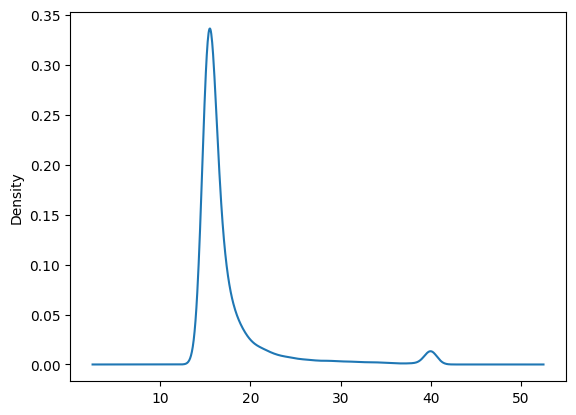

In [32]:
df['deliver_time'].plot(kind='kde')

In [33]:
df['deliver_time'].quantile(0.95)

27.261043996666658

In [34]:
df.shape

(15000, 7)

In [35]:
print('15000 No. of deliveries are place in a Month of March')
print('')
print("557 No. of Pizza's delivered time are greater than 31 minutes, so they are delivered as free.")
print('')
print('14443 No. of pizza are delivered within time.')
print('')
print('So, the', (15000-557)/15000 * 100, '% pizzas are delivered less than 31 minutes.')

15000 No. of deliveries are place in a Month of March

557 No. of Pizza's delivered time are greater than 31 minutes, so they are delivered as free.

14443 No. of pizza are delivered within time.

So, the 96.28666666666666 % pizzas are delivered less than 31 minutes.


# Summary

In [36]:
print('On Time Deliveries:   ', 14443)
print('Late Deliveries:      ', 557)
print('Average Delivery Time:', df['deliver_time'].mean())
print('Delivery Performance: ', (15000-557)/15000 * 100)

On Time Deliveries:    14443
Late Deliveries:       557
Average Delivery Time: 17.50021796338111
Delivery Performance:  96.28666666666666


# In Conclusion

In [37]:
print('More than 95th (',(15000-557)/15000 * 100,') Percentile on Order Delivery time should be less than 31 mins (',df['deliver_time'].mean(),').')

More than 95th ( 96.28666666666666 ) Percentile on Order Delivery time should be less than 31 mins ( 17.50021796338111 ).


# Pizza Store is Performs well as per the given Metrics.